https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation - looks like same as CDC wonder. Other stuff worth looking at

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('suicide_abc.txt', sep = '\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 14 columns):
Notes                                              75 non-null object
County                                             3147 non-null object
County Code                                        3147 non-null float64
Deaths                                             3148 non-null object
Population                                         3148 non-null object
Crude Rate                                         3148 non-null object
Crude Rate Lower 95% Confidence Interval           3148 non-null object
Crude Rate Upper 95% Confidence Interval           3148 non-null object
Crude Rate Standard Error                          3148 non-null object
Age Adjusted Rate                                  3148 non-null object
Age Adjusted Rate Lower 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Upper 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Standard Err

In [4]:
df.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error,% of Total Deaths
0,NaN,"Autauga County, AL",1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,36.1,6.1,0.0%
1,NaN,"Baldwin County, AL",1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,23.6,2.9,0.1%
2,NaN,"Barbour County, AL",1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
3,NaN,"Bibb County, AL",1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
4,NaN,"Blount County, AL",1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,35.2,6.0,0.0%


In [5]:
df["County_list"]= df["County"].str.split(",")
df['County'] = df['County_list'].str[0]
df['State'] = df['County_list'].str[1]
df["County"]= df["County"].str.replace(" County", "") 
df=df.rename(columns = {'County Code':'County_code'})
df = df.drop(['Notes', 'County_list'], axis = 1)

df['County Code'] = df['County_code'].astype(float)
df.dropna()

df.head()

,County,County_code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error,% of Total Deaths,State,County Code
0,Autauga,1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,36.1,6.1,0.0%,AL,1001.0
1,Baldwin,1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,23.6,2.9,0.1%,AL,1003.0
2,Barbour,1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,AL,1005.0
3,Bibb,1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,AL,1007.0
4,Blount,1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,35.2,6.0,0.0%,AL,1009.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 15 columns):
County                                             3147 non-null object
County_code                                        3147 non-null float64
Deaths                                             3148 non-null object
Population                                         3148 non-null object
Crude Rate                                         3148 non-null object
Crude Rate Lower 95% Confidence Interval           3148 non-null object
Crude Rate Upper 95% Confidence Interval           3148 non-null object
Crude Rate Standard Error                          3148 non-null object
Age Adjusted Rate                                  3148 non-null object
Age Adjusted Rate Lower 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Upper 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Standard Error                   3148 non-null object
% of Total Deaths           

In [7]:
df1 = pd.read_csv('2019_county_health_rankings.csv')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 53 columns):
FIPS                                  3142 non-null int64
State                                 3142 non-null object
County                                3142 non-null object
Years of Potential Life Lost Rate     2908 non-null float64
% Fair/Poor Health                    3142 non-null int64
Physically Unhealthy Days             3142 non-null float64
Mentally Unhealthy Days               3142 non-null float64
% LBW                                 3035 non-null float64
% LBW (Black)                         1389 non-null float64
% LBW (Hispanic)                      1404 non-null float64
% LBW (White)                         1816 non-null float64
% Smokers                             3142 non-null int64
% Obese                               3142 non-null int64
Food Environment Index                3123 non-null float64
% Physically Inactive                 3142 non-null int64
% Wit

In [9]:
df1.head()

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair/Poor Health,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% LBW (Black),% LBW (Hispanic),...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,8824.0,18,4.2,4.3,8.0,13.0,NaN,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1,1003,Alabama,Baldwin,7225.0,18,4.1,4.2,8.0,15.0,5.0,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
2,1005,Alabama,Barbour,9586.0,26,5.1,4.6,11.0,14.0,NaN,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
3,1007,Alabama,Bibb,11784.0,20,4.4,4.3,11.0,18.0,NaN,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
4,1009,Alabama,Blount,10908.0,21,4.5,4.7,8.0,NaN,7.0,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60


In [10]:
df1['County_code'] = df1['FIPS'].astype(float)
df1.drop('FIPS', axis = 1, inplace = True)

In [11]:
df1.set_index('County_code')

,State,County,Years of Potential Life Lost Rate,% Fair/Poor Health,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% LBW (Black),% LBW (Hispanic),% LBW (White),...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
County_code,,,,,,,,,,,,,,,,,,,,,
1001.0,Alabama,Autauga,8824.0,18,4.2,4.3,8.0,13.0,NaN,7.0,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1003.0,Alabama,Baldwin,7225.0,18,4.1,4.2,8.0,15.0,5.0,8.0,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
1005.0,Alabama,Barbour,9586.0,26,5.1,4.6,11.0,14.0,NaN,8.0,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
1007.0,Alabama,Bibb,11784.0,20,4.4,4.3,11.0,18.0,NaN,9.0,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
1009.0,Alabama,Blount,10908.0,21,4.5,4.7,8.0,NaN,7.0,8.0,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037.0,Wyoming,Sweetwater,7497.0,15,3.5,3.5,9.0,NaN,9.0,10.0,...,4.4,23.0,44,10.0,300.0,85.0,5.1,Yes,10,19
56039.0,Wyoming,Teton,3786.0,12,3.2,3.1,7.0,NaN,8.0,7.0,...,3.9,24.0,42,18.1,NaN,62.0,4.9,Yes,16,15
56041.0,Wyoming,Uinta,7790.0,16,3.7,3.7,10.0,NaN,11.0,9.0,...,4.6,22.0,11,5.3,71.0,98.0,5.9,Yes,11,18


In [12]:
a = pd.merge(df, df1, on ='County_code') 
a.sort_values('County_code')

,County_x,County_code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
0,Autauga,1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1,Baldwin,1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
2,Barbour,1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
3,Bibb,1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
4,Blount,1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,Sweetwater,56037.0,16,43534,Unreliable,21.0,59.7,9.2,Unreliable,20.0,...,4.4,23.0,44,10.0,300.0,85.0,5.1,Yes,10,19
3136,Teton,56039.0,Suppressed,23265,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,3.9,24.0,42,18.1,NaN,62.0,4.9,Yes,16,15
3137,Uinta,56041.0,Suppressed,20495,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,4.6,22.0,11,5.3,71.0,98.0,5.9,Yes,11,18
3138,Washakie,56043.0,Suppressed,8064,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,3.6,27.0,16,19.4,78.0,70.0,4.8,No,11,11


In [13]:
a.columns

Index(['County_x', 'County_code', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error',
       'Age Adjusted Rate', 'Age Adjusted Rate Lower 95% Confidence Interval',
       'Age Adjusted Rate Upper 95% Confidence Interval',
       'Age Adjusted Rate Standard Error', '% of Total Deaths', 'State_x',
       'County Code', 'State_y', 'County_y',
       'Years of Potential Life Lost Rate', '% Fair/Poor Health',
       'Physically Unhealthy Days', 'Mentally Unhealthy Days', '% LBW',
       '% LBW (Black)', '% LBW (Hispanic)', '% LBW (White)', '% Smokers',
       '% Obese', 'Food Environment Index', '% Physically Inactive',
       '% With Access', '% Excessive Drinking',
       '# Alcohol-Impaired Driving Deaths', '# Driving Deaths',
       '% driving deaths Alcohol-Impaired ', 'Teen Birth Rate',
       'Teen Birth Rate (Black)', 'Teen Birth Rate (Hispanic)',
       'Teen Birth 

In [14]:
droplist = ['Physically Unhealthy Days', 'Mentally Unhealthy Days','Deaths', 'Population', \
            'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error', \
            'Age Adjusted Rate Lower 95% Confidence Interval', 'Age Adjusted Rate Upper 95% Confidence Interval', \
            'Age Adjusted Rate Standard Error', 'County Code', 'State_y', 'County_y', '# Alcohol-Impaired Driving Deaths', \
            '# Driving Deaths', '# Associations', 'Presence of violation', 'Injury Death Rate', '% of Total Deaths', '% Vaccinated', \
            '% Vaccinated (Black)', '% Vaccinated (Hispanic)',\
            '% Children in Poverty (Black)', '% Children in Poverty (Hispanic)', '% Children in Poverty (White)', '% Vaccinated (White)',\
            '% LBW (Black)', '% LBW (Hispanic)', '% LBW (White)', 'Crude Rate', 'Years of Potential Life Lost Rate', \
           'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (Hispanic)', 'Preventable Hosp. Rate (White)']

a = a.drop(droplist, axis = 1)

In [15]:
# filter 
a = a[a['Age Adjusted Rate'] != 'Unreliable']
a = a[a['Age Adjusted Rate'] != 'Suppressed']

# change some ratios and percents to integers/floats
a = a.replace({':1':''}, regex = True)
a = a.replace({'\%':''}, regex = True)

# change type 
a['Age Adjusted Rate'] = a['Age Adjusted Rate'].astype(float)
a['Dentist Ratio'] = a['Dentist Ratio'].astype(float)
a['MHP Ratio'] = a['MHP Ratio'].astype(float)
a['PCP Ratio'] = a['PCP Ratio'].astype(float)

In [16]:
a.head()

,County_x,County_code,Age Adjusted Rate,State_x,% Fair/Poor Health,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,...,% Some College,% Unemployed,% Children in Poverty,Income Ratio inequality,% Single-Parent Households,Association Rate,Violent Crime Rate,Average Daily PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone
1,Baldwin,1003.0,17.0,AL,18,8.0,17,31,8.0,24,...,66,4.0,15.0,4.5,25.0,10.7,204.0,10.3,14,41
7,Calhoun,1015.0,24.6,AL,20,9.0,20,37,6.9,30,...,58,4.9,24.0,5.0,39.0,14.3,756.0,11.8,15,31
21,Cullman,1043.0,24.7,AL,21,8.0,20,35,8.3,33,...,51,3.7,19.0,4.6,28.0,12.6,129.0,11.6,14,35
24,DeKalb,1049.0,28.5,AL,23,8.0,22,30,8.4,31,...,44,4.5,28.0,4.7,33.0,9.0,312.0,11.3,13,30
36,Jefferson,1073.0,16.2,AL,20,11.0,18,33,6.2,28,...,67,4.2,23.0,5.4,44.0,14.5,873.0,13.4,18,33


In [17]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 3129
Data columns (total 33 columns):
County_x                              536 non-null object
County_code                           536 non-null float64
Age Adjusted Rate                     536 non-null float64
State_x                               536 non-null object
% Fair/Poor Health                    536 non-null int64
% LBW                                 536 non-null float64
% Smokers                             536 non-null int64
% Obese                               536 non-null int64
Food Environment Index                536 non-null float64
% Physically Inactive                 536 non-null int64
% With Access                         536 non-null float64
% Excessive Drinking                  536 non-null int64
% driving deaths Alcohol-Impaired     536 non-null float64
Teen Birth Rate                       536 non-null float64
Teen Birth Rate (Black)               493 non-null float64
Teen Birth Rate (Hisp

In [18]:
objectdroplist = ['State_x', 'County_code']
statdf = a.drop(objectdroplist, axis = 1)
statdf = statdf.fillna(statdf.mean())

In [19]:
statdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 3129
Data columns (total 31 columns):
County_x                              536 non-null object
Age Adjusted Rate                     536 non-null float64
% Fair/Poor Health                    536 non-null int64
% LBW                                 536 non-null float64
% Smokers                             536 non-null int64
% Obese                               536 non-null int64
Food Environment Index                536 non-null float64
% Physically Inactive                 536 non-null int64
% With Access                         536 non-null float64
% Excessive Drinking                  536 non-null int64
% driving deaths Alcohol-Impaired     536 non-null float64
Teen Birth Rate                       536 non-null float64
Teen Birth Rate (Black)               536 non-null float64
Teen Birth Rate (Hispanic)            536 non-null float64
Teen Birth Rate (White)               536 non-null float64
% Uninsured         

In [20]:
import statsmodels.api as sm

X = statdf.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = statdf.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=statdf)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              276.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   1.31e-289
Time:                        14:47:18   Log-Likelihood:                         -1552.6
No. Observations:                 536   AIC:                                      3163.
Df Residuals:                     507   BIC:                                      3287.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
% Fair/Poor Health                    -0.3881      0.141     -2.756      0.006      -0.665      -0.111
% LBW                                  0.1138      0.239      0.476      0.634      -0.356       0.583
% Smokers                              0.5760      0.123      4.699      0.000       0.335       0.817
% Obese                                0.0534      0.075      0.714      0.476      -0.094       0.200
Food Environment Index                 0.3332      0.356      0.937      0.349      -0.365       1.032
% Physically Inactive                 -0.1430      0.091     -1.576      0.116      -0.321       0.035
% With Access                         -0.0481      0.025     -1.902      0.058      -0.098       0.002
% Excessive Drinking                  -0.0783      0.094     -0.832      0.406      -0.263       0.107
% driving deaths Alcohol-Impaired      0.0491      0.030      1.623      0.105      -0.010       0.109
Teen Birth Rate                        0.1106      0.067      1.651      0.099      -0.021       0.242
Teen Birth Rate (Black)               -0.0023      0.023     -0.099      0.921      -0.047       0.042
Teen Birth Rate (Hispanic)            -0.0426      0.020     -2.110      0.035      -0.082      -0.003
Teen Birth Rate (White)                0.2933      0.053      5.526      0.000       0.189       0.398
% Uninsured                            0.0332      0.075      0.444      0.657      -0.114       0.180
PCP Ratio                              0.0022      0.000      4.580      0.000       0.001       0.003
Dentist Ratio                         -0.0012      0.000     -2.517      0.012      -0.002      -0.000
MHP Ratio                              0.0002      0.001      0.335      0.738      -0.001       0.002
Preventable Hosp. Rate                -0.0013      0.000     -5.137      0.000      -0.002      -0.001
Graduation Rate                        0.1382      0.038      3.603      0.000       0.063       0.214
% Some College                         0.0949      0.039      2.415      0.016       0.018       0.172
% Unemployed                           0.1122      0.208      0.540      0.589      -0.296       0.521
% Children in Poverty                  0.1637      0.082      1.997      0.046       0.003       0.325
Income Ratio inequality                0.7557      0.503      1.501      0.134      -0.233       1.745
% Single-Parent Households            -0.1130      0.062     -1.834      0.067      -0.234       0.008
Association Rate                       0.1797      0.094      1.902      0.058      -0.006       0.365
Violent Crime Rate                    -0.0015      0.001     -1.132      0.258      -0.004       0.0

In [21]:
b = abs(statdf.corr()['Age Adjusted Rate']).sort_values(ascending = False)

In [22]:
b

Age Adjusted Rate                     1.000000
Teen Birth Rate (White)               0.582323
% With Access                         0.489895
% Long Commute - Drives Alone         0.413941
Teen Birth Rate                       0.408039
Food Environment Index                0.350515
% Smokers                             0.327213
% Some College                        0.321345
Average Daily PM2.5                   0.315408
% Severe Housing Problems             0.242023
% Obese                               0.220620
% Excessive Drinking                  0.214435
% Children in Poverty                 0.206363
Association Rate                      0.197092
Teen Birth Rate (Black)               0.193255
PCP Ratio                             0.190364
Income Ratio inequality               0.185862
% Uninsured                           0.168355
% driving deaths Alcohol-Impaired     0.162013
% Physically Inactive                 0.154346
Graduation Rate                       0.146085
% Fair/Poor H

In [23]:
b = b.to_frame()

In [24]:
# statsdf_smaller = b['Age Adjusted Rate']
b_smaller = b[b['Age Adjusted Rate'] < 0.2]
bad_cols_list = b_smaller.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this

In [25]:
tidy = statdf.drop(bad_cols_list, axis = 1)

In [26]:
tidy.head()

,County_x,Age Adjusted Rate,% Smokers,% Obese,Food Environment Index,% With Access,% Excessive Drinking,Teen Birth Rate,Teen Birth Rate (White),% Some College,% Children in Poverty,Average Daily PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone
1,Baldwin,17.0,17,31,8.0,72.0,17,30.0,28.0,66,15.0,10.3,14,41
7,Calhoun,24.6,20,37,6.9,45.0,15,37.0,36.0,58,24.0,11.8,15,31
21,Cullman,24.7,20,35,8.3,46.0,16,45.0,45.0,51,19.0,11.6,14,35
24,DeKalb,28.5,22,30,8.4,47.0,15,42.0,41.0,44,28.0,11.3,13,30
36,Jefferson,16.2,18,33,6.2,80.0,16,32.0,17.0,67,23.0,13.4,18,33


In [27]:
import seaborn as sns

sns.heatmap(tidy.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
sns.pairplot(tidy, height=1.2, aspect=1.5);


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


In [28]:
X = tidy.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = tidy.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=tidy)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              558.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   2.25e-289
Time:                        14:47:32   Log-Likelihood:                         -1606.0
No. Observations:                 536   AIC:                                      3236.
Df Residuals:                     524   BIC:                                      3287.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
% Smokers                         0.2486      0.116      2.141      0.033       0.021       0.477
% Obese                           0.0021      0.068      0.031      0.975      -0.131       0.136
Food Environment Index            1.3405      0.295      4.539      0.000       0.760       1.921
% With Access                    -0.0953      0.024     -3.991      0.000      -0.142      -0.048
% Excessive Drinking              0.0654      0.086      0.758      0.449      -0.104       0.235
Teen Birth Rate                  -0.0172      0.048     -0.359      0.720      -0.112       0.077
Teen Birth Rate (White)           0.4091      0.046      8.918      0.000       0.319       0.499
% Some College                    0.1838      0.031      5.838      0.000       0.122       0.246
% Children in Poverty             0.0157      0.064      0.246      0.806      -0.110       0.141
Average Daily PM2.5              -0.9196      0.124     -7.412      0.000      -1.163      -0.676
% Severe Housing Problems         0.1197      0.064      1.865      0.063      -0.006       0.246
% Long Commute - Drives Alone    -0.1028      0.022     -4.754      0.000      -0.145      -0.060
==============================================================================
Omnibus:                       85.874   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.057
Skew:                           0.755   Prob(JB):                     3.38e-57
Kurtosis:                       6.060   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
tidy['% With Access eng 1'] = (tidy['% With Access'])**4


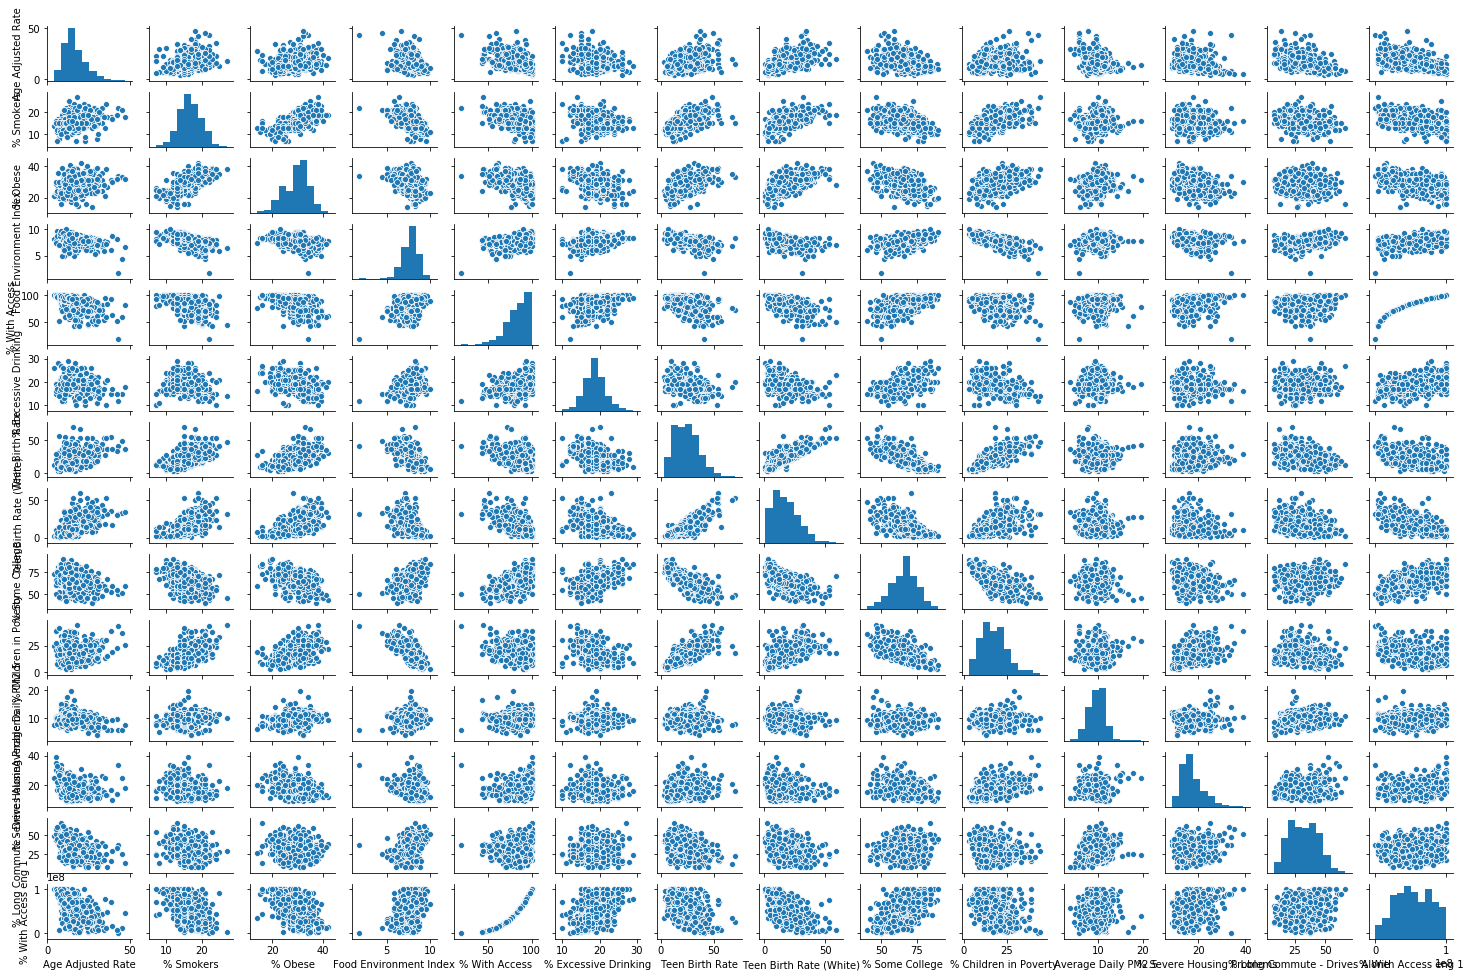

In [30]:
sns.pairplot(tidy, height=1.2, aspect=1.5);

In [31]:
tidy = tidy.drop(['% With Access'], axis = 1)

In [32]:
X = tidy.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = tidy.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=tidy)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              576.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   1.02e-292
Time:                        14:48:13   Log-Likelihood:                         -1598.1
No. Observations:                 536   AIC:                                      3220.
Df Residuals:                     524   BIC:                                      3272.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
% Smokers                         0.2550      0.114      2.229      0.026       0.030       0.480
% Obese                          -0.0534      0.068     -0.790      0.430      -0.186       0.080
Food Environment Index            1.1636      0.278      4.191      0.000       0.618       1.709
% Excessive Drinking              0.0595      0.085      0.702      0.483      -0.107       0.226
Teen Birth Rate                   0.0025      0.048      0.052      0.958      -0.091       0.096
Teen Birth Rate (White)           0.3626      0.047      7.764      0.000       0.271       0.454
% Some College                    0.1723      0.029      5.953      0.000       0.115       0.229
% Children in Poverty            -0.0016      0.063     -0.026      0.980      -0.125       0.122
Average Daily PM2.5              -0.9272      0.122     -7.584      0.000      -1.167      -0.687
% Severe Housing Problems         0.1178      0.063      1.884      0.060      -0.005       0.241
% Long Commute - Drives Alone    -0.0956      0.021     -4.492      0.000      -0.137      -0.054
% With Access eng 1           -6.762e-08   1.19e-08     -5.661      0.000   -9.11e-08   -4.42e-08
==============================================================================
Omnibus:                       93.863   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.721
Skew:                           0.801   Prob(JB):                     4.11e-67
Kurtosis:                       6.335   Cond. No.                     8.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# tidy = tidy.drop(['% Smokers', 'Teen Birth Rate', '% Obese', '% Excessive Drinking'], axis = 1)
X = tidy.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = tidy.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=tidy)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              576.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   1.02e-292
Time:                        14:48:13   Log-Likelihood:                         -1598.1
No. Observations:                 536   AIC:                                      3220.
Df Residuals:                     524   BIC:                                      3272.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
% Smokers                         0.2550      0.114      2.229      0.026       0.030       0.480
% Obese                          -0.0534      0.068     -0.790      0.430      -0.186       0.080
Food Environment Index            1.1636      0.278      4.191      0.000       0.618       1.709
% Excessive Drinking              0.0595      0.085      0.702      0.483      -0.107       0.226
Teen Birth Rate                   0.0025      0.048      0.052      0.958      -0.091       0.096
Teen Birth Rate (White)           0.3626      0.047      7.764      0.000       0.271       0.454
% Some College                    0.1723      0.029      5.953      0.000       0.115       0.229
% Children in Poverty            -0.0016      0.063     -0.026      0.980      -0.125       0.122
Average Daily PM2.5              -0.9272      0.122     -7.584      0.000      -1.167      -0.687
% Severe Housing Problems         0.1178      0.063      1.884      0.060      -0.005       0.241
% Long Commute - Drives Alone    -0.0956      0.021     -4.492      0.000      -0.137      -0.054
% With Access eng 1           -6.762e-08   1.19e-08     -5.661      0.000   -9.11e-08   -4.42e-08
==============================================================================
Omnibus:                       93.863   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.721
Skew:                           0.801   Prob(JB):                     4.11e-67
Kurtosis:                       6.335   Cond. No.                     8.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
tidy = tidy.drop(['% Severe Housing Problems', '% Children in Poverty'], axis = 1)
X = tidy.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = tidy.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=tidy)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              686.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   2.09e-294
Time:                        14:48:13   Log-Likelihood:                         -1600.8
No. Observations:                 536   AIC:                                      3222.
Df Residuals:                     526   BIC:                                      3264.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
% Smokers                         0.2750      0.103      2.665      0.008       0.072       0.478
% Obese                          -0.0783      0.066     -1.179      0.239      -0.209       0.052
Food Environment Index            1.2446      0.264      4.715      0.000       0.726       1.763
% Excessive Drinking              0.0815      0.084      0.965      0.335      -0.084       0.247
Teen Birth Rate                   0.0493      0.036      1.362      0.174      -0.022       0.120
Teen Birth Rate (White)           0.3317      0.043      7.668      0.000       0.247       0.417
% Some College                    0.1734      0.029      5.998      0.000       0.117       0.230
Average Daily PM2.5              -0.9207      0.123     -7.512      0.000      -1.161      -0.680
% Long Commute - Drives Alone    -0.0848      0.021     -4.094      0.000      -0.126      -0.044
% With Access eng 1           -6.305e-08   1.18e-08     -5.336      0.000   -8.63e-08   -3.98e-08
==============================================================================
Omnibus:                      105.459   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.612
Skew:                           0.867   Prob(JB):                     8.26e-84
Kurtosis:                       6.758   Cond. No.                     7.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

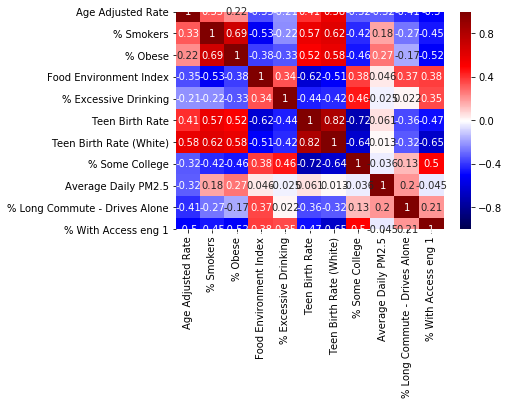

In [35]:
sns.heatmap(tidy.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

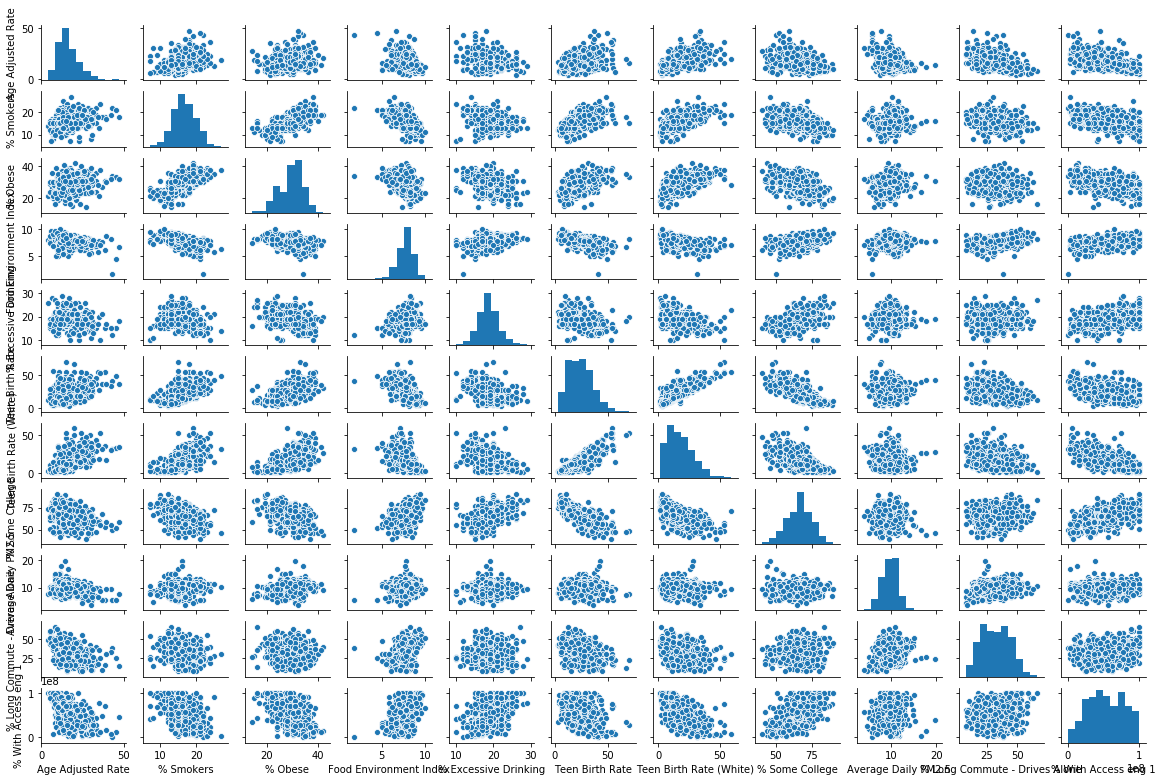

In [36]:
sns.pairplot(tidy, height=1.2, aspect=1.5);

In [37]:
tidy.corr()['Age Adjusted Rate']

Age Adjusted Rate                1.000000
% Smokers                        0.327213
% Obese                          0.220620
Food Environment Index          -0.350515
% Excessive Drinking            -0.214435
Teen Birth Rate                  0.408039
Teen Birth Rate (White)          0.582323
% Some College                  -0.321345
Average Daily PM2.5             -0.315408
% Long Commute - Drives Alone   -0.413941
% With Access eng 1             -0.503895
Name: Age Adjusted Rate, dtype: float64

In [39]:
objectdroplist = ['State_x', 'County_code' ]
first_round_feat_eng = ['% Severe Housing Problems', '% Children in Poverty', '% Smokers', 'Teen Birth Rate', '% Obese', '% Excessive Drinking']

statdf2 = a.drop(objectdroplist + first_round_feat_eng, axis = 1)
statdf2 = statdf.fillna(statdf.mean())

In [40]:
statdf2.head()

,County_x,Age Adjusted Rate,% Fair/Poor Health,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,...,% Some College,% Unemployed,% Children in Poverty,Income Ratio inequality,% Single-Parent Households,Association Rate,Violent Crime Rate,Average Daily PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone
1,Baldwin,17.0,18,8.0,17,31,8.0,24,72.0,17,...,66,4.0,15.0,4.5,25.0,10.7,204.0,10.3,14,41
7,Calhoun,24.6,20,9.0,20,37,6.9,30,45.0,15,...,58,4.9,24.0,5.0,39.0,14.3,756.0,11.8,15,31
21,Cullman,24.7,21,8.0,20,35,8.3,33,46.0,16,...,51,3.7,19.0,4.6,28.0,12.6,129.0,11.6,14,35
24,DeKalb,28.5,23,8.0,22,30,8.4,31,47.0,15,...,44,4.5,28.0,4.7,33.0,9.0,312.0,11.3,13,30
36,Jefferson,16.2,20,11.0,18,33,6.2,28,80.0,16,...,67,4.2,23.0,5.4,44.0,14.5,873.0,13.4,18,33


In [41]:
statdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 3129
Data columns (total 31 columns):
County_x                              536 non-null object
Age Adjusted Rate                     536 non-null float64
% Fair/Poor Health                    536 non-null int64
% LBW                                 536 non-null float64
% Smokers                             536 non-null int64
% Obese                               536 non-null int64
Food Environment Index                536 non-null float64
% Physically Inactive                 536 non-null int64
% With Access                         536 non-null float64
% Excessive Drinking                  536 non-null int64
% driving deaths Alcohol-Impaired     536 non-null float64
Teen Birth Rate                       536 non-null float64
Teen Birth Rate (Black)               536 non-null float64
Teen Birth Rate (Hispanic)            536 non-null float64
Teen Birth Rate (White)               536 non-null float64
% Uninsured         

In [42]:
X = statdf2.drop(columns=["Age Adjusted Rate", 'County_x']).astype(float)
y = statdf2.loc[:,"Age Adjusted Rate"].astype(float)
model = sm.OLS(y, X, data=statdf2)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Age Adjusted Rate   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              276.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                   1.31e-289
Time:                        14:48:40   Log-Likelihood:                         -1552.6
No. Observations:                 536   AIC:                                      3163.
Df Residuals:                     507   BIC:                                      3287.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
% Fair/Poor Health                    -0.3881      0.141     -2.756      0.006      -0.665      -0.111
% LBW                                  0.1138      0.239      0.476      0.634      -0.356       0.583
% Smokers                              0.5760      0.123      4.699      0.000       0.335       0.817
% Obese                                0.0534      0.075      0.714      0.476      -0.094       0.200
Food Environment Index                 0.3332      0.356      0.937      0.349      -0.365       1.032
% Physically Inactive                 -0.1430      0.091     -1.576      0.116      -0.321       0.035
% With Access                         -0.0481      0.025     -1.902      0.058      -0.098       0.002
% Excessive Drinking                  -0.0783      0.094     -0.832      0.406      -0.263       0.107
% driving deaths Alcohol-Impaired      0.0491      0.030      1.623      0.105      -0.010       0.109
Teen Birth Rate                        0.1106      0.067      1.651      0.099      -0.021       0.242
Teen Birth Rate (Black)               -0.0023      0.023     -0.099      0.921      -0.047       0.042
Teen Birth Rate (Hispanic)            -0.0426      0.020     -2.110      0.035      -0.082      -0.003
Teen Birth Rate (White)                0.2933      0.053      5.526      0.000       0.189       0.398
% Uninsured                            0.0332      0.075      0.444      0.657      -0.114       0.180
PCP Ratio                              0.0022      0.000      4.580      0.000       0.001       0.003
Dentist Ratio                         -0.0012      0.000     -2.517      0.012      -0.002      -0.000
MHP Ratio                              0.0002      0.001      0.335      0.738      -0.001       0.002
Preventable Hosp. Rate                -0.0013      0.000     -5.137      0.000      -0.002      -0.001
Graduation Rate                        0.1382      0.038      3.603      0.000       0.063       0.214
% Some College                         0.0949      0.039      2.415      0.016       0.018       0.172
% Unemployed                           0.1122      0.208      0.540      0.589      -0.296       0.521
% Children in Poverty                  0.1637      0.082      1.997      0.046       0.003       0.325
Income Ratio inequality                0.7557      0.503      1.501      0.134      -0.233       1.745
% Single-Parent Households            -0.1130      0.062     -1.834      0.067      -0.234       0.008
Association Rate                       0.1797      0.094      1.902      0.058      -0.006       0.365
Violent Crime Rate                    -0.0015      0.001     -1.132      0.258      -0.004       0.0